<u><b>Deep Learning : Principles and Practices - CSE1016 - L33 + L34</b></u>

<u><b>Name: </b></u> Gaurav Pendharkar

<u><b>Registration No: </b></u> 20BAI1153

<u><b>Lab - 8 : </b></u> Sentiment Analysis on IMDB dataset using Recurrent Neural Networks.

# Importing the required modules

In [36]:
from keras.datasets import imdb
from keras_preprocessing.sequence import pad_sequences
from keras import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
import matplotlib.pyplot as plt

# Loading the dataset

In [46]:
class Dataset:
    
    def __init__(self):
        self.VOCABULARY_SIZE = 5000
        self.word2id = None
        self.id2word = None
    
    def load_dataset(self):
        (self.X_train, self.y_train), (self.X_test, self.y_test) = imdb.load_data(num_words = vocabulary_size)
        print('Loaded dataset with {} training samples, {} test samples'.format(len(self.X_train), 
                                                                                len(self.X_test)))
        
    def word_index(self):
        self.word2id = imdb.get_word_index()
        self.id2word = {i: word for word, i in word2id.items()}
        print('Review with words:')
        print([id2word.get(i, ' ') for i in self.X_train[6]])
        print('Label:')
        print(y_train[6])
    
    def plot_review_lengths(self):
        l = list(map(len, self.X_train + self.X_test))
        
        plt.figure(figsize = (8,8))
        plt.hist(l,
                 color="crimson",
                 edgecolor="black")
        plt.xlabel("Length of Reviews")
        plt.ylabel("Number of review of that length")
        plt.show()
        

## Loading the dataset

In [47]:
d = Dataset()

In [48]:
d.load_dataset()

Loaded dataset with 25000 training samples, 25000 test samples


## Loading the word index from keras

In [49]:
d.word_index()

Review with words:
['the', 'and', 'full', 'involving', 'to', 'impressive', 'boring', 'this', 'as', 'and', 'and', 'br', 'villain', 'and', 'and', 'need', 'has', 'of', 'costumes', 'b', 'message', 'to', 'may', 'of', 'props', 'this', 'and', 'and', 'concept', 'issue', 'and', 'to', "god's", 'he', 'is', 'and', 'unfolds', 'movie', 'women', 'like', "isn't", 'surely', "i'm", 'and', 'to', 'toward', 'in', "here's", 'for', 'from', 'did', 'having', 'because', 'very', 'quality', 'it', 'is', 'and', 'and', 'really', 'book', 'is', 'both', 'too', 'worked', 'carl', 'of', 'and', 'br', 'of', 'reviewer', 'closer', 'figure', 'really', 'there', 'will', 'and', 'things', 'is', 'far', 'this', 'make', 'mistakes', 'and', 'was', "couldn't", 'of', 'few', 'br', 'of', 'you', 'to', "don't", 'female', 'than', 'place', 'she', 'to', 'was', 'between', 'that', 'nothing', 'and', 'movies', 'get', 'are', 'and', 'br', 'yes', 'female', 'just', 'its', 'because', 'many', 'br', 'of', 'overly', 'to', 'descent', 'people', 'time', 'very

## Visualising the review lengths

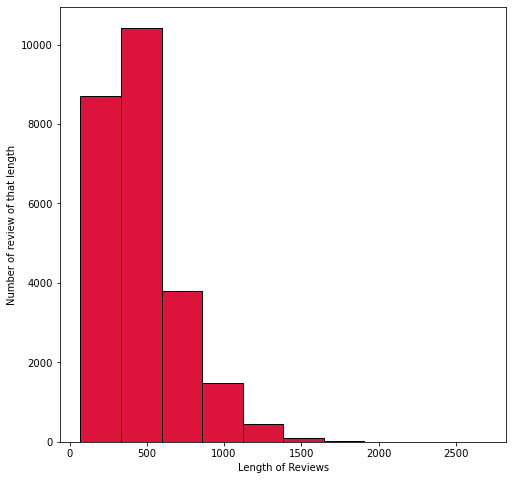

In [50]:
d.plot_review_lengths()

# Model Building

In [38]:
class RNN:
    
    def __init__(self, X_train, y_train, X_test, y_test) -> None:
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        self.EMBEDDING_SIZE = 32
        self.VOCABULARY_SIZE = 5000
        self.BATCH_SIZE = 32
        self.NUM_EPOCHS = 5
        self.max_words = None
        self.model = None
        
        
        
    def __pad_word_vectors(self, max_words : int) -> None:
        self.max_words = max_words
        self.X_train = pad_sequences(self.X_train, 
                                     maxlen = self.max_words)
        self.X_test =  pad_sequences(self.X_test,
                                    maxlen = self.max_words)
        
    def __train_validation_split(self):
        self.X_valid, self.y_valid = X_train[:self.BATCH_SIZE], y_train[:self.BATCH_SIZE]
        self.X_train, self.y_train = X_train[self.BATCH_SIZE:], y_train[self.BATCH_SIZE:]
    
    def preprocessing(self):
        self.__pad_word_vectors(500)
        self.__train_validation_split()
    
    def build_model(self):
        self.model=Sequential()
        self.model.add(Embedding(self.VOCABULARY_SIZE, 
                            self.EMBEDDING_SIZE, 
                            input_length=self.max_words))
        self.model.add(LSTM(100))
        self.model.add(Dense(1, activation='sigmoid'))
        print(self.model.summary())
    
    def compile_model(self):
        self.model.compile(loss='binary_crossentropy', 
                      optimizer='adam', 
                      metrics=['accuracy'])
    
    
    def train_model(self):
        self.history = self.model.fit(self.X_train, 
                                 self.y_train, 
                                 validation_data=(self.X_valid, 
                                                  self.y_valid), 
                                 batch_size=self.BATCH_SIZE, 
                                 epochs=self.NUM_EPOCHS)
    
    def plot_history(self):
        fig, axs = plt.subplots(2, 1, figsize=(15,15))
        axs[0].plot(self.history.history['loss'])
        axs[0].plot(self.history.history['val_loss'])
        axs[0].title.set_text('Training Loss vs Validation Loss')
        axs[0].set_xlabel('Epochs')
        axs[0].set_ylabel('Loss')
        axs[0].legend(['Train','Val'])

        axs[1].plot(self.history.history['accuracy'])
        axs[1].plot(self.history.history['val_accuracy'])
        axs[1].title.set_text('Training Accuracy vs Validation Accuracy')
        axs[1].set_xlabel('Epochs')
        axs[1].set_ylabel('Accuracy')
        axs[1].legend(['Train', 'Val'])
    
    def evaluate_model(self):
        scores = model.evaluate(self.X_test, 
                                self.y_test, 
                                verbose=0)
        
        print('Test accuracy:', scores[1])
    

## Initiating the RNN

In [39]:
r = RNN(X_train, y_train, X_test, y_test)

## Preprocessing the data

In [40]:
r.preprocessing()

## Designing the model

In [41]:
r.build_model()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 500, 32)           160000    
                                                                 
 lstm_2 (LSTM)               (None, 100)               53200     
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 213,301
Trainable params: 213,301
Non-trainable params: 0
_________________________________________________________________
None


## Compiling the model

In [42]:
r.compile_model()

## Training the model

In [43]:
r.train_model()

Epoch 1/5
781/781 [==============================] - 447s 565ms/step - loss: 0.2915 - accuracy: 0.8836 - val_loss: 0.2506 - val_accuracy: 0.8750
Epoch 2/5
781/781 [==============================] - 463s 593ms/step - loss: 0.2373 - accuracy: 0.9082 - val_loss: 0.2600 - val_accuracy: 0.9375
Epoch 3/5
781/781 [==============================] - 425s 544ms/step - loss: 0.2179 - accuracy: 0.9175 - val_loss: 0.3957 - val_accuracy: 0.7500
Epoch 4/5
781/781 [==============================] - 390s 500ms/step - loss: 0.2052 - accuracy: 0.9200 - val_loss: 0.4089 - val_accuracy: 0.8438
Epoch 5/5
781/781 [==============================] - 265s 339ms/step - loss: 0.1924 - accuracy: 0.9259 - val_loss: 0.4533 - val_accuracy: 0.8438


## Plotting the training history

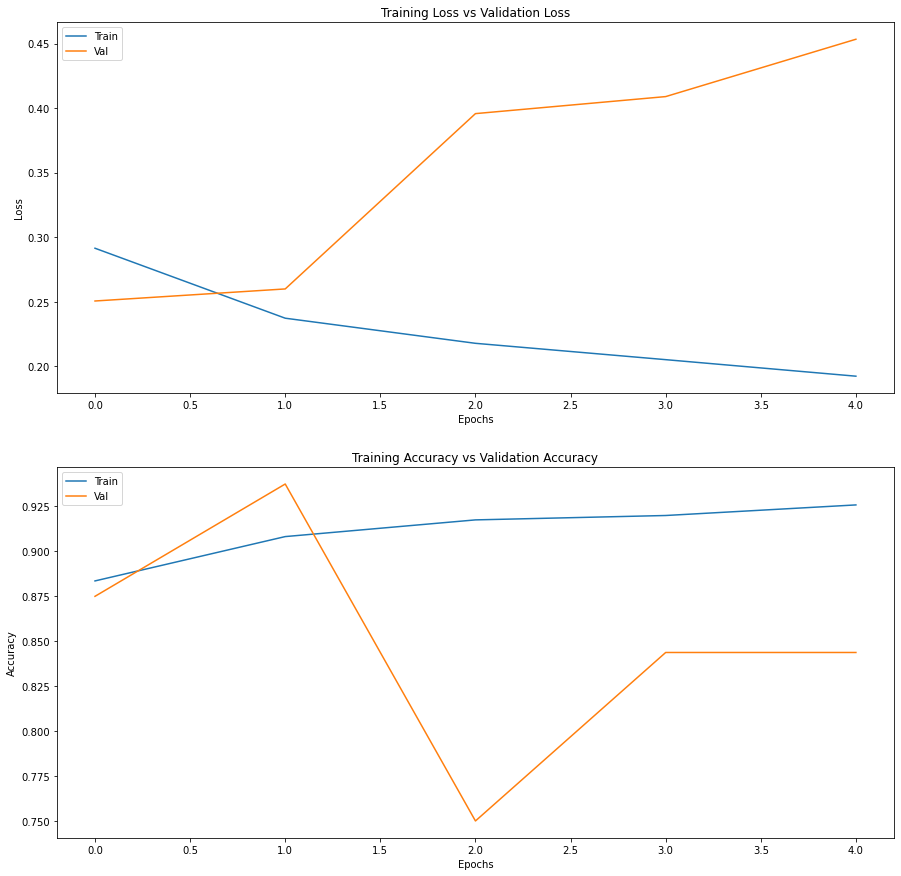

In [44]:
r.plot_history()

## Evaluating the model

In [45]:
r.evaluate_model()

Test accuracy: 0.817359983921051


# Conclusion